In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from pathlib import Path
from urllib.parse import urlparse
from PIL import Image
import requests
from io import BytesIO

sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12


file_path = Path().resolve() # Path(__file__).resolve()
project_dir = file_path.parent
raw_data_path = project_dir / 'data' / 'raw'

In [35]:
df = pd.read_csv(raw_data_path / 'full_orders_v6.csv', sep=None, engine='python')
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['product_created_at'] = pd.to_datetime(df['product_created_at'], errors='coerce')
df['sale_percentage'] = pd.to_numeric(df['sale_percentage'], errors='coerce')
df['base_price'] = pd.to_numeric(df['base_price'], errors='coerce')
df['net_price'] = pd.to_numeric(df['net_price'], errors='coerce')

df.tail()

,anon_id_encrypred,articul_encrypred,color_base,sizeid,size_title,order_date,store,brand,ktt1,ktt2,ktt3,ktt4,title,product_id,product_created_at,base_price,net_price,sale_percentage,slug,photo_analytics
3485907,wyyypqqtpquqttur,vqssypr,Розовый,10,132-143cm,2021-02-18,T,Dolce&Gabbana,Товары для детей,Товары для девочек,Одежда,Платье,Хлопковое платье,13654085,2021-01-10,65350.0,63809.70,0.023570,7022813-khlopkovoe-plate-dolce-gabbana-rozovyi,https://st-cdn.tsum.com/int/height/1526/i/46/6...
3485908,wyyysqqtqsqqwqqq,vqqtsxv,Синий,M,48,2021-02-18,T,BOSS,Товары для мужчин,Одежда,Одежда вязаная,Пуловеры вязаные,Шерстяной джемпер,13648456,2020-12-18,21700.0,0.34,0.999984,7005297-sherstyanoi-dzhemper-boss-temno-sinii,https://st-cdn.tsum.com/int/height/1526/i/ee/9...
3485909,wyyysqqtqpwxrpyy,wyttxqt,Белый,40,40,2021-02-18,T,Premiata,Товары для мужчин,Обувь,Кроссовки,Кроссовки,Комбинированные кроссовки Nous,13520630,2020-04-11,34650.0,34650.00,0.000000,6855905-kombinirovannye-krossovki-nous-premiat...,https://st-cdn.tsum.com/int/height/1526/i/a9/e...
3485910,wyyypqqtpqqyuqqx,vqquspp,Чёрный,48,48,2021-02-18,T,Dolce&Gabbana,Товары для мужчин,Одежда,Одежда верхняя,Жилеты,Утепленный жилет,13627178,2020-10-21,124500.0,124500.00,0.000000,7004211-uteplennyi-zhilet-dolce-gabbana-chernyi,https://st-cdn.tsum.com/int/height/1526/i/ad/b...
3485911,wyyyrqqtqqrruyyp,vqsywtp,Серый,40,42,2021-02-18,T,The Attico,Товары для женщин,Одежда,Одежда джинсовая,Куртка джинсовая,Джинсовая куртка,13661506,2021-02-01,238500.0,222965.80,0.065133,7028651-dzhinsovaya-kurtka-the-attico-temno-seryi,https://st-cdn.tsum.com/int/height/1526/i/7c/7...


In [36]:
df.describe(include='all')

,anon_id_encrypred,articul_encrypred,color_base,sizeid,size_title,order_date,store,brand,ktt1,ktt2,ktt3,ktt4,title,product_id,product_created_at,base_price,net_price,sale_percentage,slug,photo_analytics
count,3485912,3485912,3485912,3485912,3485912,3485912,3485912,3485912,3485912,3485912,3485912,3485912,3485912,3.485912e+06,3485912,3.485912e+06,3.485912e+06,3.485912e+06,3485773,3468238
unique,453947,234460,29,2934,3175,NaN,5,1281,11,39,248,862,27695,NaN,NaN,NaN,NaN,NaN,314097,306672
top,wyyysqqtqppqswsy,wprtppp,Чёрный,NS,NS,NaN,E,Dolce&Gabbana,Товары для мужчин,Одежда,Одежда джерси,Футболка джерси,Хлопковая футболка,NaN,NaN,NaN,NaN,NaN,6135111-komplekt-iz-dvukh-bokserov-dolce-gabba...,https://st-cdn.tsum.com/int/height/1526/i/63/4...
freq,2446,4195,926875,427196,426931,NaN,1809878,272298,1497363,1585240,565707,188225,303299,NaN,NaN,NaN,NaN,NaN,1640,1640
mean,NaN,NaN,NaN,NaN,NaN,2020-02-17 23:26:17.405741568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.274209e+07,2019-01-29 16:55:23.774093824,4.334072e+04,4.000978e+04,9.481292e-02,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.203101e+06,2010-12-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2019-08-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.293048e+07,2018-09-14 00:00:00,1.395000e+04,1.192263e+04,0.000000e+00,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2020-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.337612e+07,2019-06-10 00:00:00,2.880000e+04,2.584256e+04,0.000000e+00,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2020-08-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.347804e+07,2020-01-30 00:00:00,5.575000e+04,5.150000e+04,1.055442e-01,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,2021-02-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.366960e+07,2021-02-24 00:00:00,2.955000e+07,2.511750e+07,1.000000e+00,NaN,NaN


In [27]:
df[df['base_price'] > 10000000]

,anon_id_encrypred,articul_encrypred,color_base,sizeid,size_title,order_date,store,brand,ktt1,ktt2,...,title,product_id,product_created_at,base_price,net_price,sale_percentage,slug,photo_analytics,discount_group,time_to_first_order
999,wyyyrqqtqqrpvxtp,twqwtru,Чёрно-белый,42,44,2019-01-02,T,Zilli,Товары для женщин,Одежда,...,Шуба из меха рыси,12816737,2018-07-06,29550000.0,25117500.0,0.15,5606534-shuba-iz-mekha-rysi-zilli-cherno-belyi,https://st-cdn.tsum.com/int/height/1526//i/58/...,<50%,180


/var/folders/y5/hs9hx8vd5qz47th8r8718p080000gn/T/ipykernel_11896/993232420.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['brand'].value_counts().head(10).values,


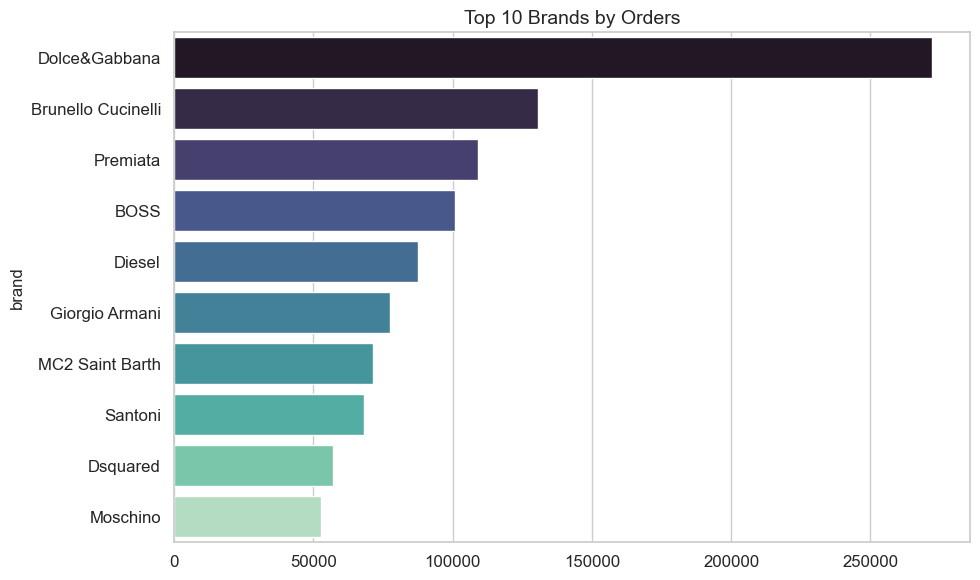

/var/folders/y5/hs9hx8vd5qz47th8r8718p080000gn/T/ipykernel_11896/993232420.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_discount.values, y=avg_discount.index, palette='rocket')


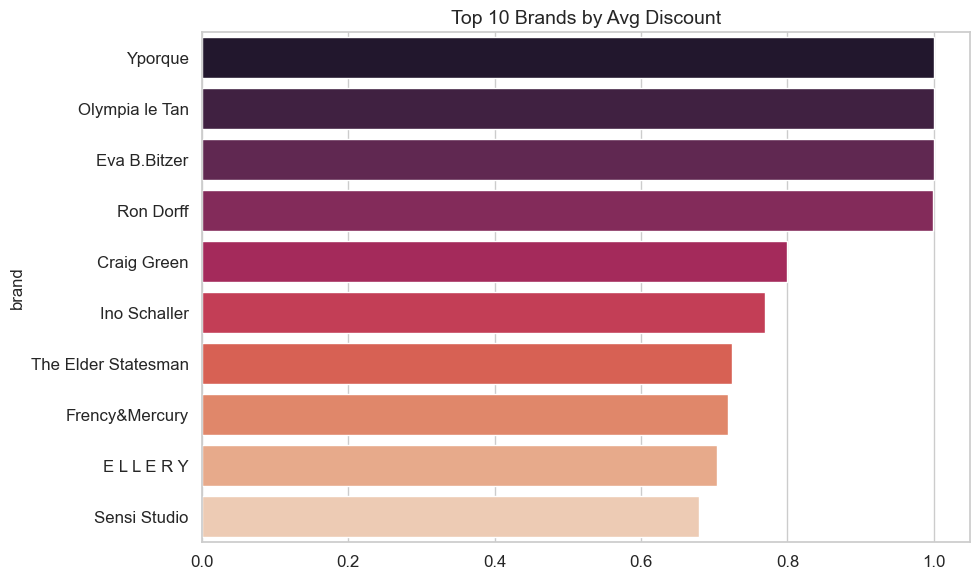

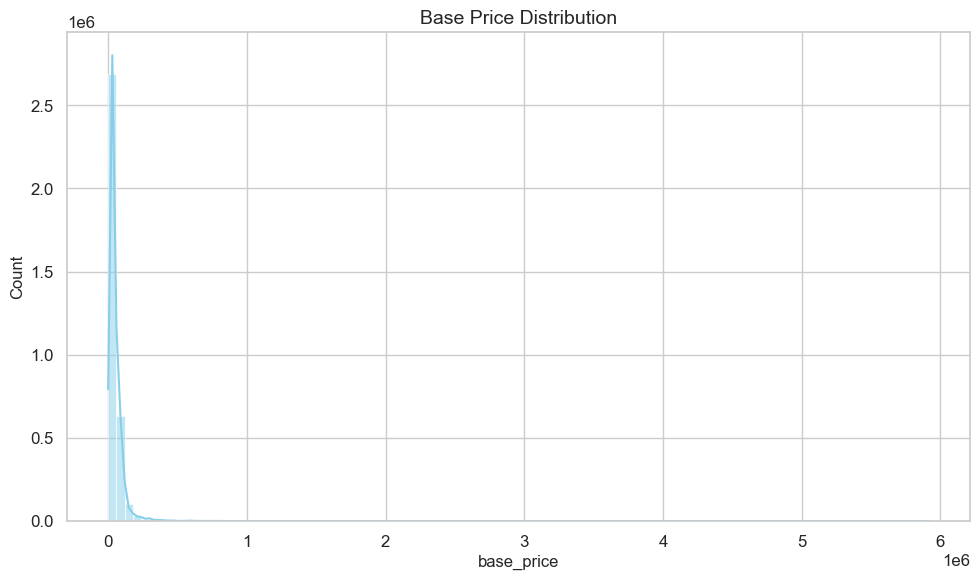

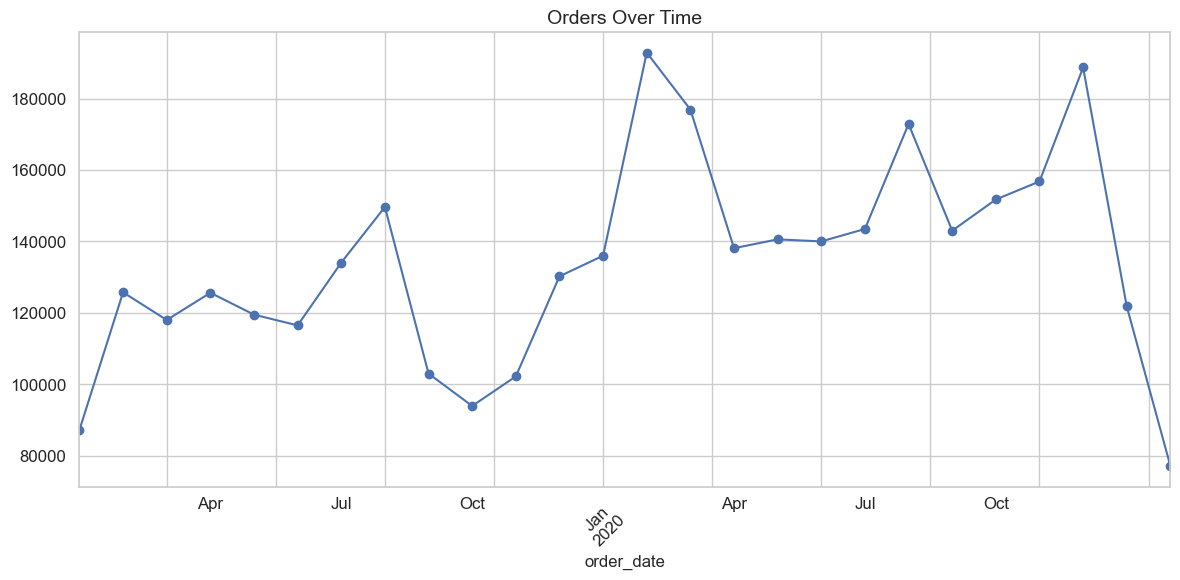

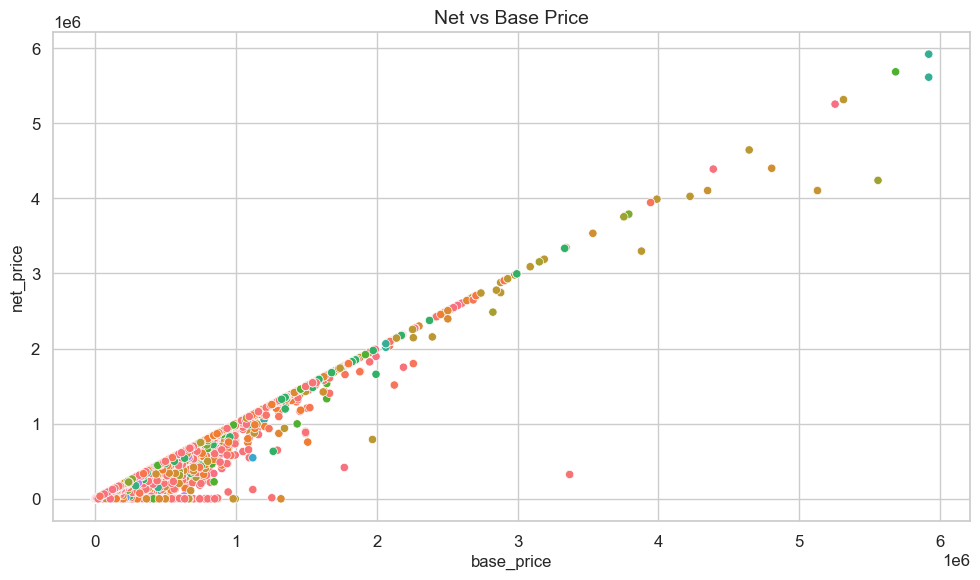

/var/folders/y5/hs9hx8vd5qz47th8r8718p080000gn/T/ipykernel_11896/993232420.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dcat.values, y=dcat.index, palette='viridis')


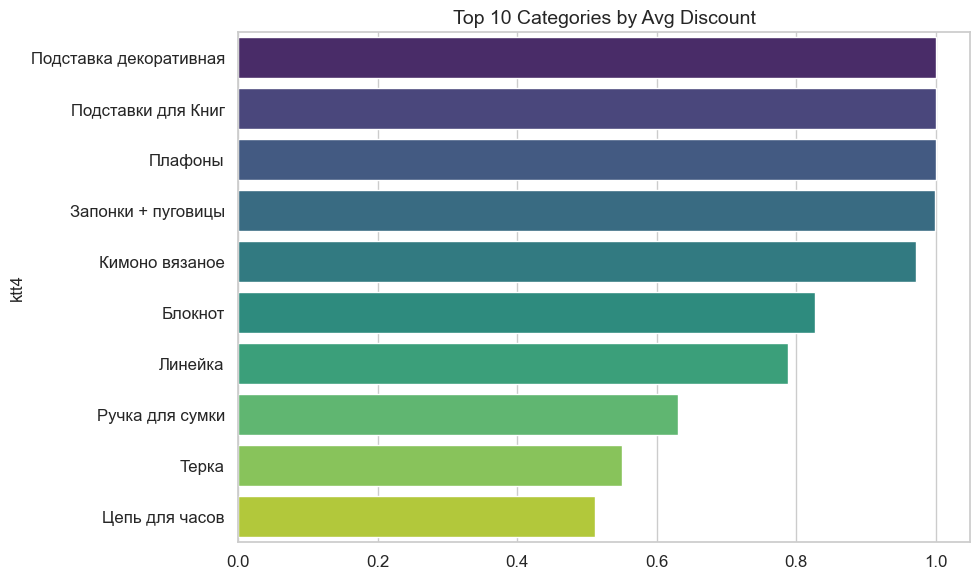

/var/folders/y5/hs9hx8vd5qz47th8r8718p080000gn/T/ipykernel_11896/993232420.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['brand'].isin(top_brands)],


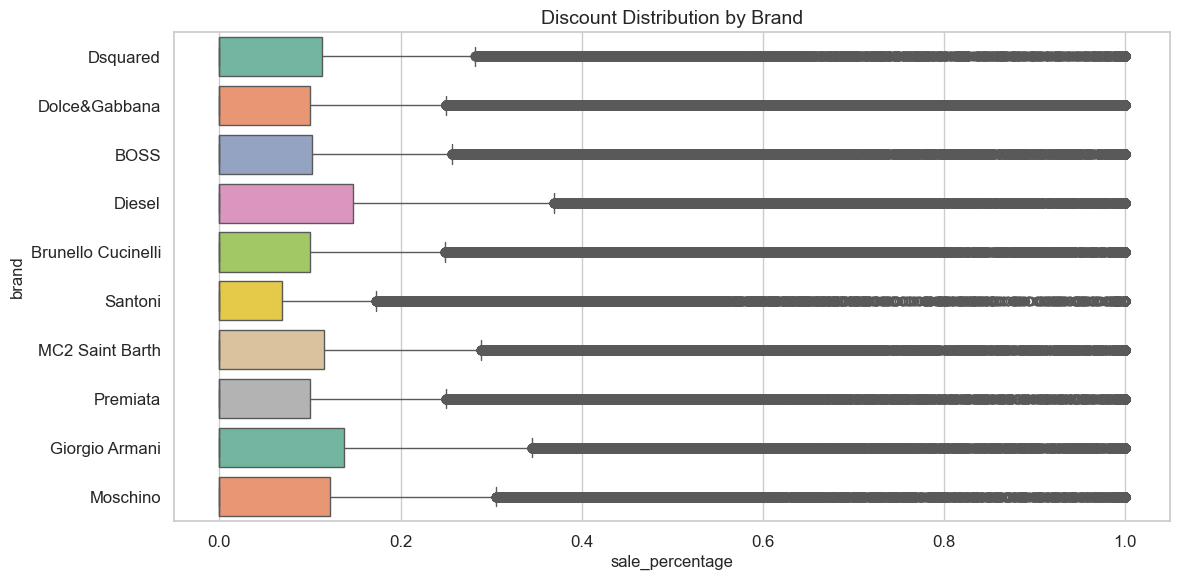

/var/folders/y5/hs9hx8vd5qz47th8r8718p080000gn/T/ipykernel_11896/993232420.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['discount_group'] = df['sale_percentage'].apply(seg)


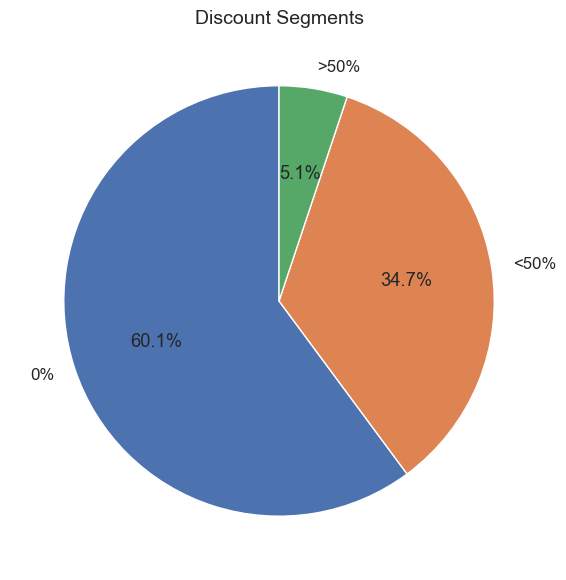

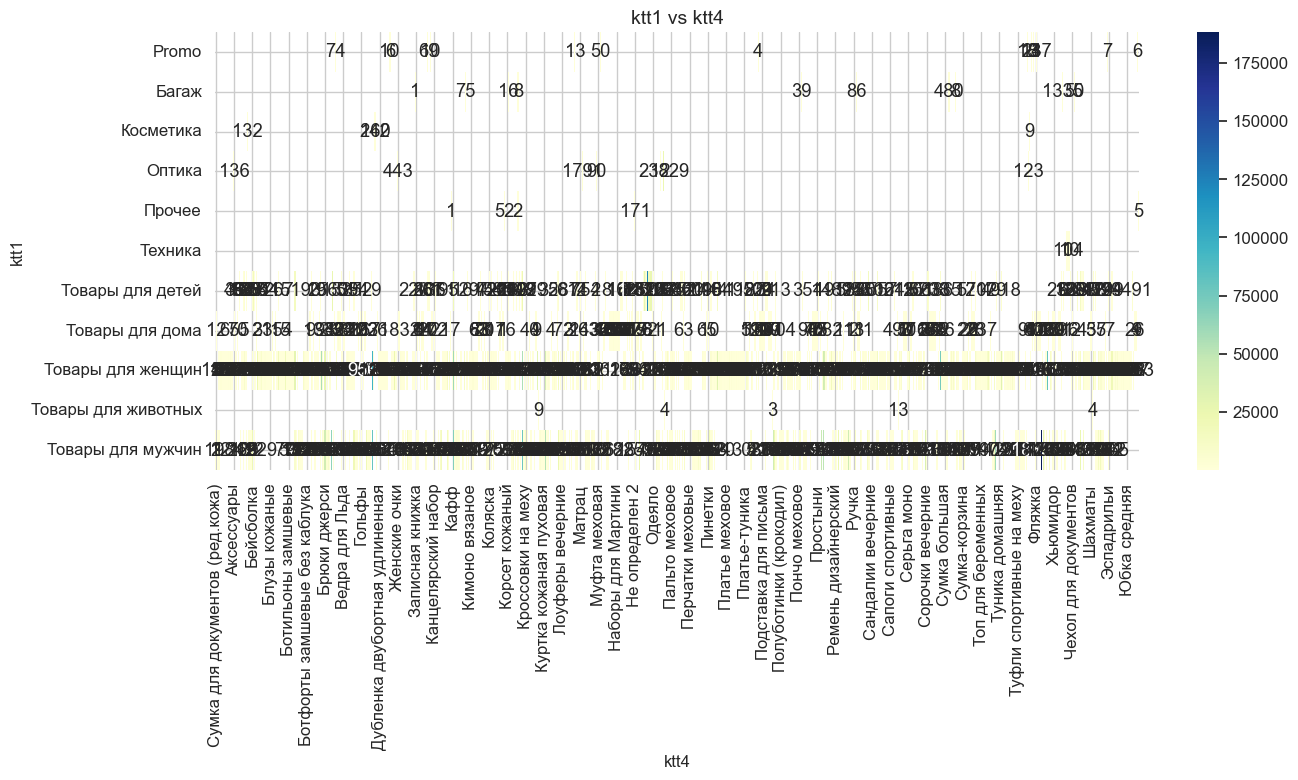

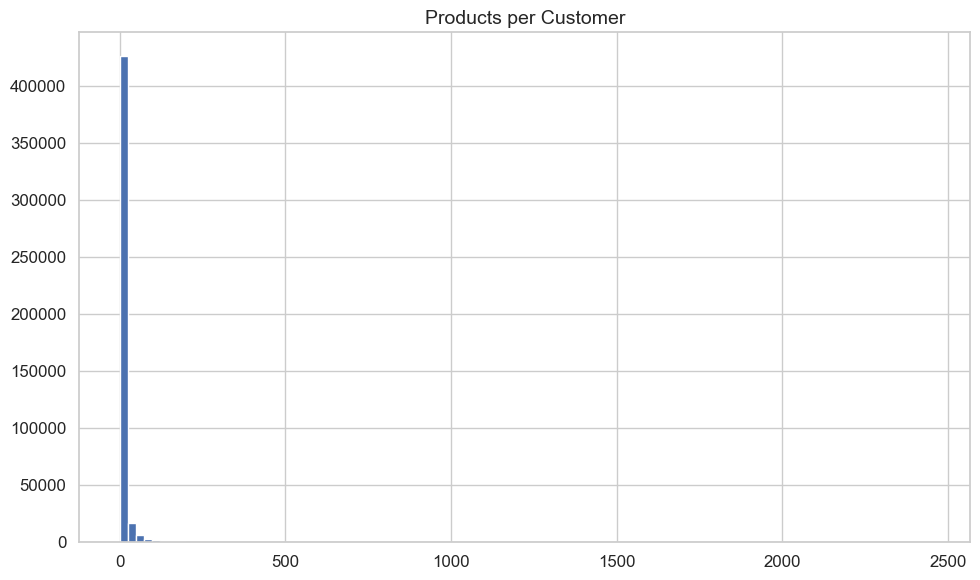

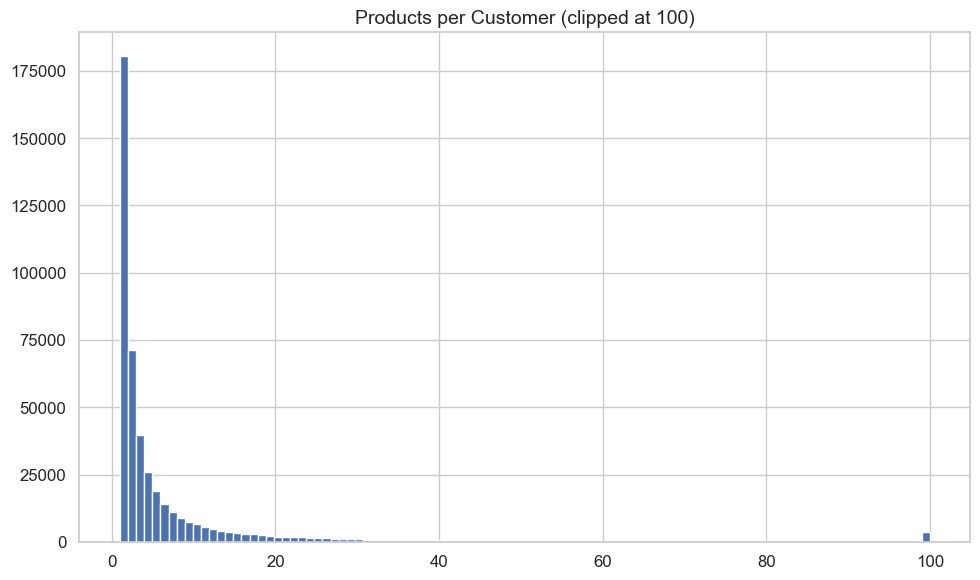

/var/folders/y5/hs9hx8vd5qz47th8r8718p080000gn/T/ipykernel_11896/993232420.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_to_first_order'] = (df['order_date'] - df['product_created_at']).dt.days


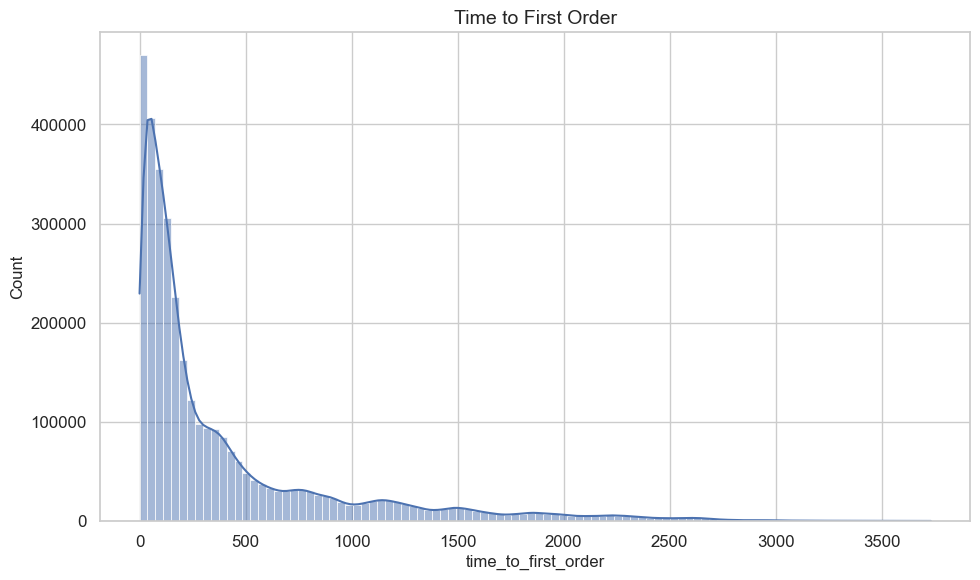


Articuls with std > 10000:
                   count            std
articul_encrypred                      
ttuswvv                2  774281.925399
ttrwwyy                2  607758.278430
qquwru                 2  551543.289326
wvwspus                2  551189.028828
ttvwvrq                2  526794.551984

Top product images:


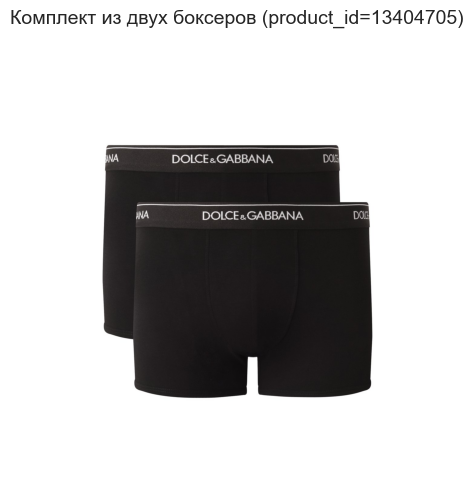

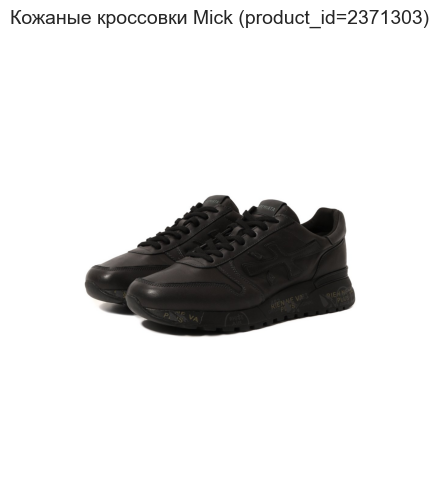

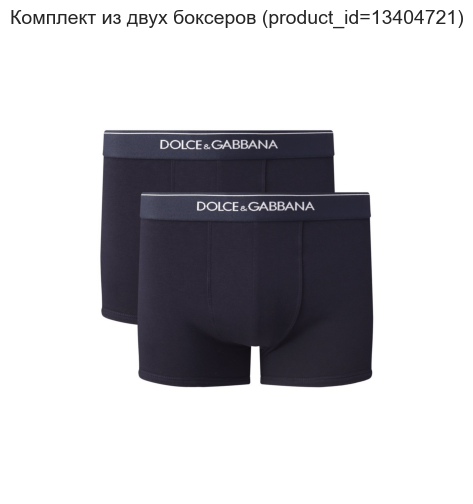

: 

In [ ]:
def plot_basic_overview(df):
    df = df[df['base_price'] <= 10000000]
    # Top brands by orders
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df['brand'].value_counts().head(10).values,
                y=df['brand'].value_counts().head(10).index,
                palette='mako')
    plt.title('Top 10 Brands by Orders')
    plt.tight_layout()
    plt.show()

    # Top brands by avg discount
    plt.figure(figsize=(10, 6))
    avg_discount = df.groupby('brand')['sale_percentage'].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=avg_discount.values, y=avg_discount.index, palette='rocket')
    plt.title('Top 10 Brands by Avg Discount')
    plt.tight_layout()
    plt.show()

    # Price distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['base_price'].dropna(), bins=100, kde=True, color='skyblue')
    plt.title('Base Price Distribution')
    plt.tight_layout()
    plt.show()

    # Orders over time
    plt.figure(figsize=(12, 6))
    ts = df.groupby(df['order_date'].dt.to_period('M')).size()
    ts.index = ts.index.to_timestamp()
    ts.plot(marker='o')
    plt.title('Orders Over Time')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(10))
    plt.tight_layout()
    plt.show()

    # Net vs Base price
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='base_price', y='net_price', hue='brand', legend=False)
    plt.title('Net vs Base Price')
    plt.tight_layout()
    plt.show()

    # Avg discount by category
    plt.figure(figsize=(10, 6))
    dcat = df.groupby('ktt4')['sale_percentage'].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=dcat.values, y=dcat.index, palette='viridis')
    plt.title('Top 10 Categories by Avg Discount')
    plt.tight_layout()
    plt.show()

    # Discount boxplot
    plt.figure(figsize=(12, 6))
    top_brands = df['brand'].value_counts().head(10).index
    sns.boxplot(data=df[df['brand'].isin(top_brands)],
                x='sale_percentage', y='brand', palette='Set2')
    plt.title('Discount Distribution by Brand')
    plt.tight_layout()
    plt.show()

    # Discount segments pie
    def seg(x):
        if x == 0: return '0%'
        if x < 0.5: return '<50%'
        return '>50%'

    df['discount_group'] = df['sale_percentage'].apply(seg)
    plt.figure(figsize=(6, 6))
    df['discount_group'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title('Discount Segments')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

    # Category heatmap
    pivot = df.pivot_table(index='ktt1', columns='ktt4', values='product_id', aggfunc='count')
    plt.figure(figsize=(14, 8))
    sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
    plt.title('ktt1 vs ktt4')
    plt.tight_layout()
    plt.show()

    # Orders per customer
    plt.figure(figsize=(10, 6))
    df['anon_id_encrypred'].value_counts().hist(bins=100)
    plt.title('Products per Customer')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    df['anon_id_encrypred'].value_counts().clip(upper=100).hist(bins=100)
    plt.title('Products per Customer (clipped at 100)')
    plt.tight_layout()
    plt.show()

    # Time to first order
    df['time_to_first_order'] = (df['order_date'] - df['product_created_at']).dt.days
    plt.figure(figsize=(10, 6))
    sns.histplot(df['time_to_first_order'].dropna().loc[lambda x: x >= 0], bins=100, kde=True)
    plt.title('Time to First Order')
    plt.tight_layout()
    plt.show()

    # Price variation by articul
    art_stats = df.groupby('articul_encrypred').agg(
        count=('base_price', 'count'),
        std=('base_price', 'std')
    )
    print('\nArticuls with std > 10000:')
    print(art_stats[art_stats['std'] > 10000].sort_values('std', ascending=False).head())

    # Product images
    print('\nTop product images:')
    top_ids = df['product_id'].value_counts().head(3).index
    for pid in top_ids:
        row = df[df['product_id'] == pid].dropna(subset=['photo_analytics']).iloc[0]
        try:
            response = requests.get(row['photo_analytics'], timeout=3)
            img = Image.open(BytesIO(response.content))
            plt.figure(figsize=(4, 6))
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{row['title']} (product_id={pid})")
            plt.show()
        except Exception as e:
            print(f'Image load failed: {e}')

plot_basic_overview(df)


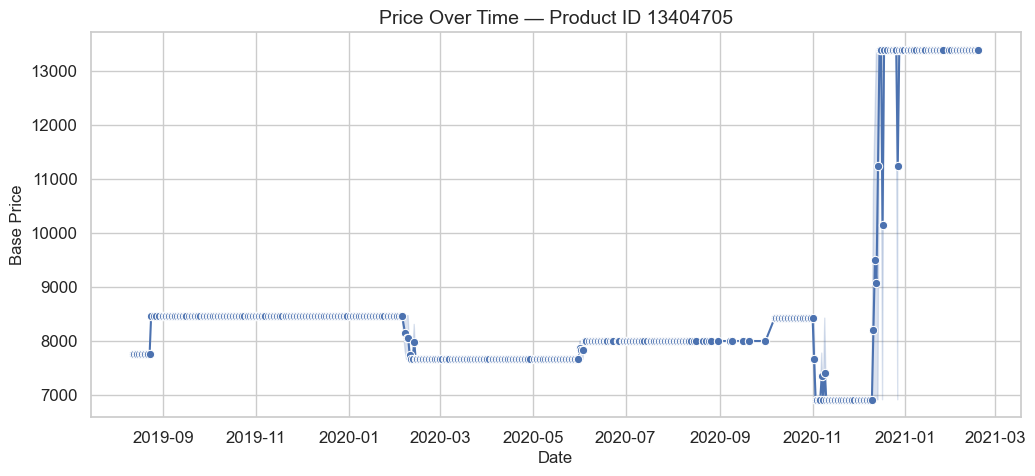

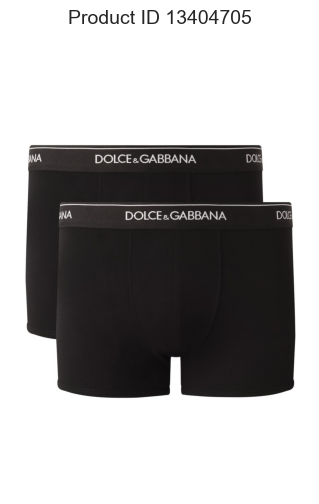

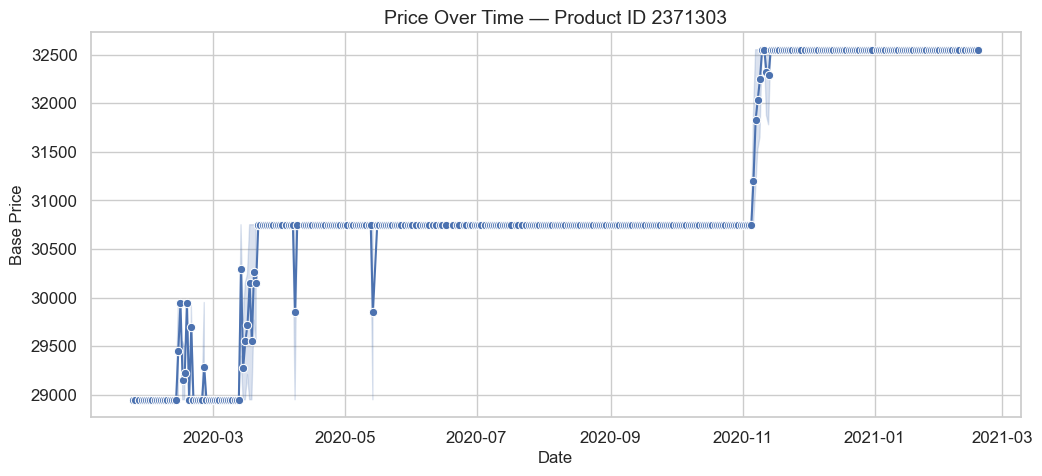

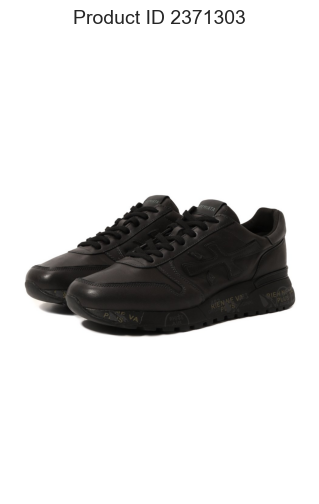

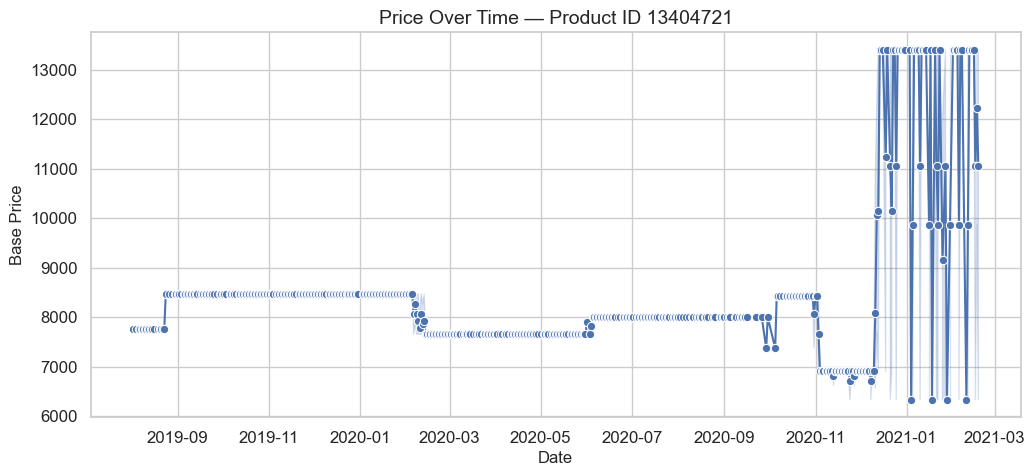

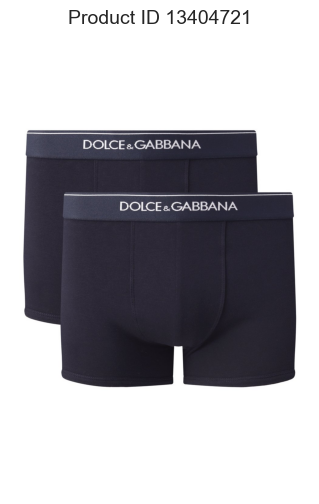

In [33]:
def plot_product_id_analysis(df):
    top_products = df['product_id'].value_counts().head(3).index
    for pid in top_products:
        subset = df[df['product_id'] == pid]
        plt.figure(figsize=(12, 5))
        sns.lineplot(data=subset, x='order_date', y='base_price', marker='o')
        plt.title(f"Price Over Time — Product ID {pid}")
        plt.xlabel("Date")
        plt.ylabel("Base Price")
        plt.grid(True)
        plt.show()

        img_url = subset['photo_analytics'].dropna().iloc[0]
        try:
            response = requests.get(img_url)
            img = Image.open(BytesIO(response.content))
            plt.figure(figsize=(4, 6))
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Product ID {pid}")
            plt.show()
        except Exception as e:
            print(f"Can't load image: {e}")

plot_product_id_analysis(df)

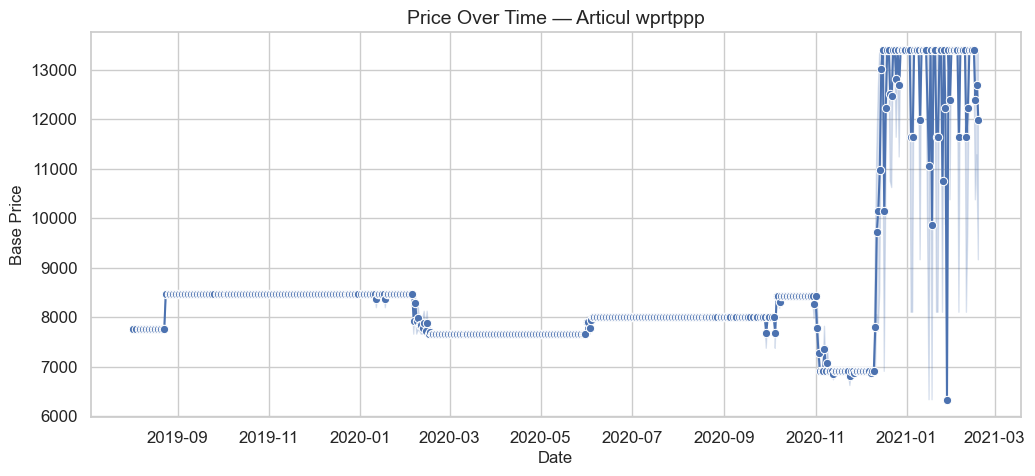

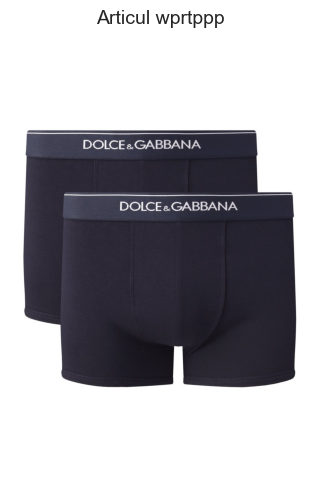

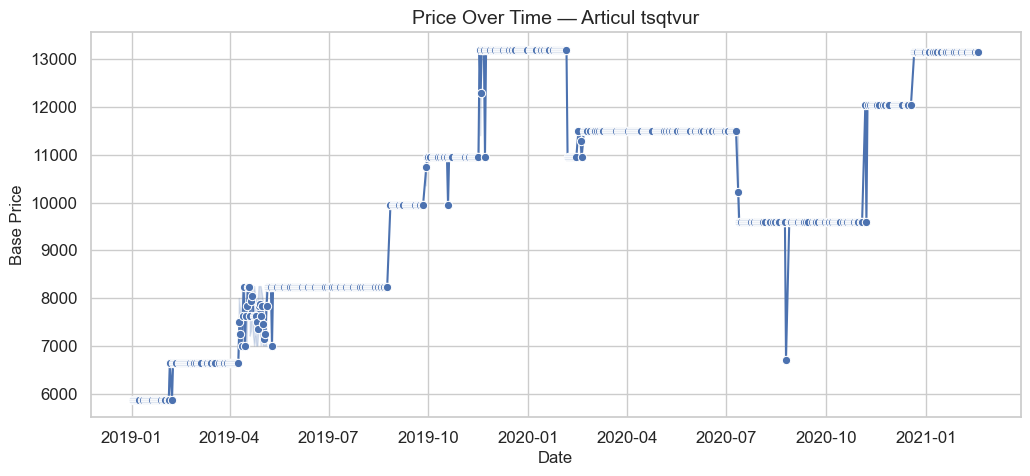

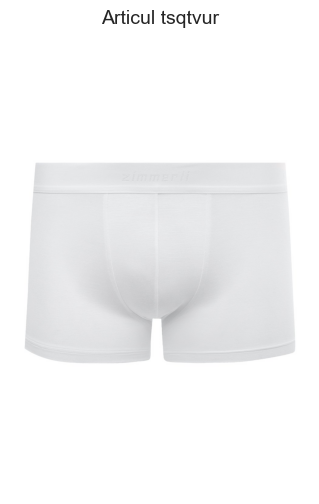

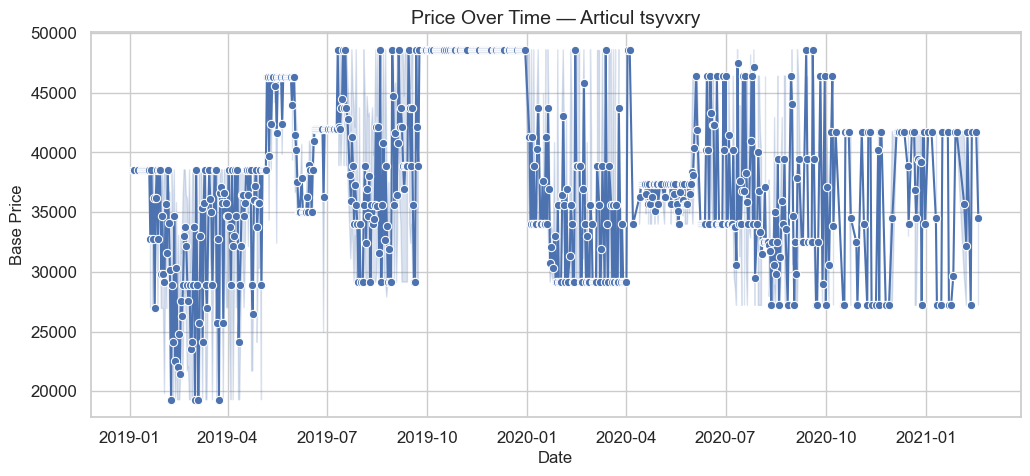

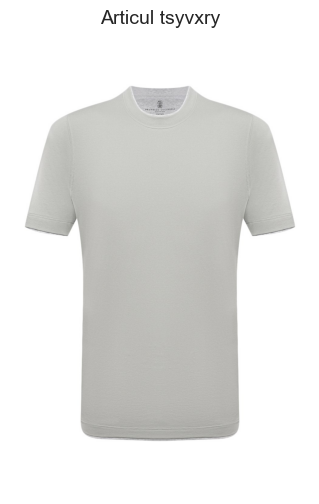

In [31]:
def plot_articul_analysis(df):
    top_articuls = df['articul_encrypred'].value_counts().head(3).index
    for art in top_articuls:
        subset = df[df['articul_encrypred'] == art]
        plt.figure(figsize=(12, 5))
        sns.lineplot(data=subset, x='order_date', y='base_price', marker='o')
        plt.title(f"Price Over Time — Articul {art}")
        plt.xlabel("Date")
        plt.ylabel("Base Price")
        plt.grid(True)
        plt.show()

        img_url = subset['photo_analytics'].dropna().iloc[0]
        try:
            response = requests.get(img_url)
            img = Image.open(BytesIO(response.content))
            plt.figure(figsize=(4, 6))
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Articul {art}")
            plt.show()
        except Exception as e:
            print(f"Can't load image: {e}")

plot_articul_analysis(df)